In [1]:
#import the libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from google.colab import files
import re
import io
import nltk

# Loading Datasets

In [3]:
# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Upload the files from your local system
uploaded = files.upload()

# Load the training dataset
train_data = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

# Load the test dataset
test_data = pd.read_csv(io.BytesIO(uploaded['Test.csv']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


Basic Structure

In [4]:
# Check the first few rows of the train dataset
train_data.head()

# Check the first few rows of the test dataset
test_data.head()

# Summary of train dataset
train_data.info()

# Summary of test dataset
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTITY_ID           100000 non-null  int64  
 1   CATEGORY_ID         100000 non-null  int64  
 2   ENTITY_LENGTH       100000 non-null  float64
 3   ENTITY_DESCRIPTION  100000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ENTITY_ID           20000 non-null  int64 
 1   CATEGORY_ID         20000 non-null  int64 
 2   ENTITY_DESCRIPTION  20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


Handling Missing Values

In [5]:
# Check for missing values
print("Train missing values:\n", train_data.isnull().sum())
print("\nTest missing values:\n", test_data.isnull().sum())

# Handling missing values

train_data['CATEGORY_ID'].fillna('Unknown', inplace=True)
test_data['CATEGORY_ID'].fillna('Unknown', inplace=True)

# Dropping missing ENTITY_DESCRIPTION
train_data.dropna(subset=['ENTITY_DESCRIPTION'], inplace=True)
test_data.dropna(subset=['ENTITY_DESCRIPTION'], inplace=True)


Train missing values:
 ENTITY_ID             0
CATEGORY_ID           0
ENTITY_LENGTH         0
ENTITY_DESCRIPTION    0
dtype: int64

Test missing values:
 ENTITY_ID             0
CATEGORY_ID           0
ENTITY_DESCRIPTION    0
dtype: int64


Text preprocessing

In [8]:
# Text cleaning function
def clean_text(text):
    # Remove special characters, numbers, punctuation
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Lowercase
    text = text.lower()

    # Tokenization and remove stopwords
    text = text.split()
    text = [word for word in text if word not in stop_words]

    # Join back to string
    return ' '.join(text)

# Apply text cleaning to both train and test datasets
train_data['cleaned_description'] = train_data['ENTITY_DESCRIPTION'].apply(clean_text)
test_data['cleaned_description'] = test_data['ENTITY_DESCRIPTION'].apply(clean_text)



Split the Training Data for Validation (Optional)

In [9]:
# Define features (X) and target variable (y)
X = train_data.drop(['ENTITY_LENGTH'], axis=1)  # Exclude the target variable
y = train_data['ENTITY_LENGTH']  # Target variable

# Train-test split for validation (optional)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


NameError: name 'train_test_split' is not defined

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for the plots
sns.set(style="whitegrid")

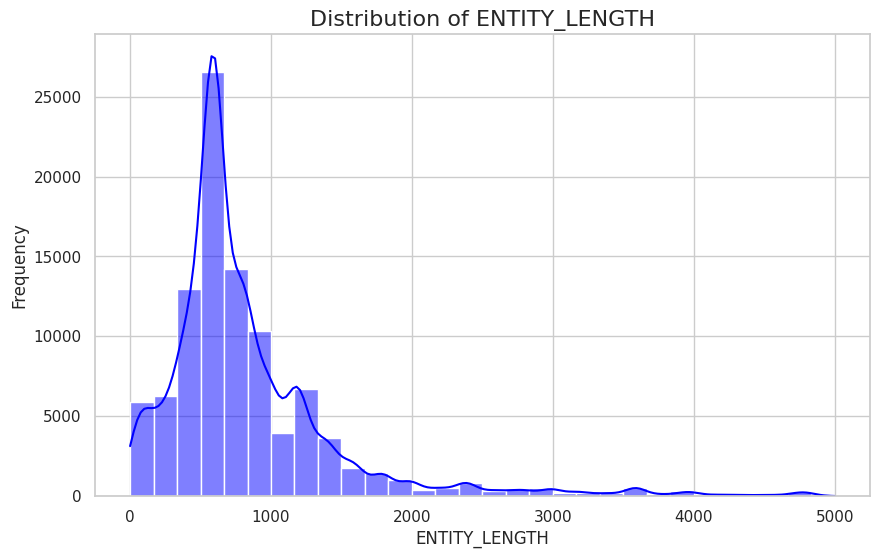

In [11]:
# Plot the distribution of the target variable ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(train_data['ENTITY_LENGTH'], kde=True, color='blue', bins=30)
plt.title('Distribution of ENTITY_LENGTH', fontsize=16)
plt.xlabel('ENTITY_LENGTH')
plt.ylabel('Frequency')
plt.show()

<ipython-input-12-25190d6f6af1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY_ID', data=train_data, palette='viridis', order=train_data['CATEGORY_ID'].value_counts().index)


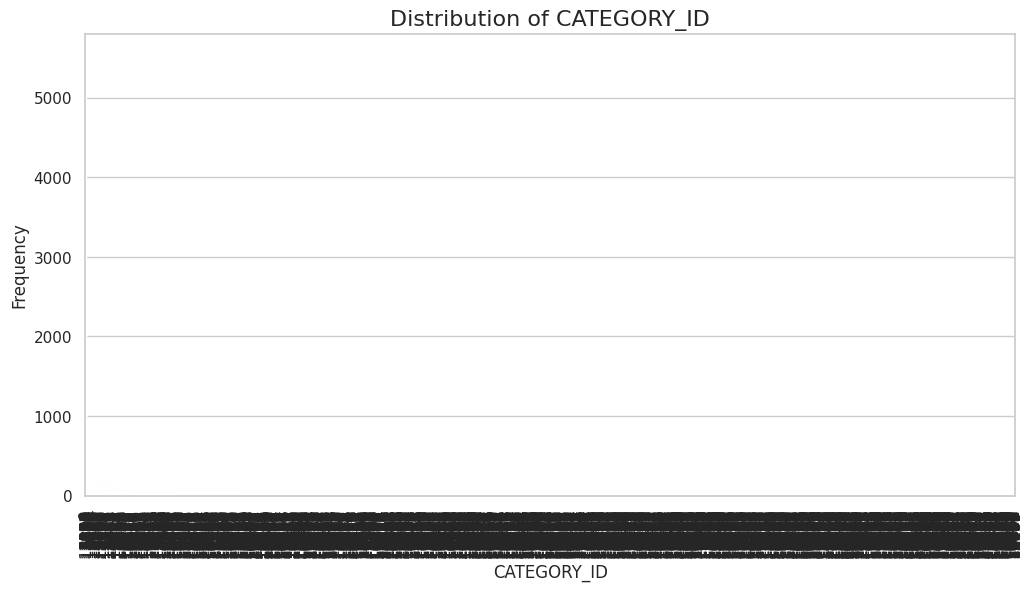

In [12]:
# Plot the distribution of CATEGORY_ID
plt.figure(figsize=(12, 6))
sns.countplot(x='CATEGORY_ID', data=train_data, palette='viridis', order=train_data['CATEGORY_ID'].value_counts().index)
plt.title('Distribution of CATEGORY_ID', fontsize=16)
plt.xlabel('CATEGORY_ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Boxplot of ENTITY_LENGTH by CATEGORY_ID
plt.figure(figsize=(14, 6))
sns.boxplot(x='CATEGORY_ID', y='ENTITY_LENGTH', data=train_data, palette='Set3')
plt.title('ENTITY_LENGTH by CATEGORY_ID', fontsize=16)
plt.xlabel('CATEGORY_ID')
plt.ylabel('ENTITY_LENGTH')
plt.xticks(rotation=90)
plt.show()



<ipython-input-14-934df4f9fe71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CATEGORY_ID', y='ENTITY_LENGTH', data=train_data, palette='Set3')


In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()
